# COVID-19 

In this notebook we will go through the developments around the COVID-19 virus infections. First we look at the developments worldwide and finally EU only.

The dataset which I use in this project is provided by the [`European Centre for Disease Prevention and Control (ECDC)`](https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases)

* Author: Erfan Nariman
* Date: 10-03-2020
* GitHub: [ErfPy](github.com/ErfPy)

---

In [1]:
import pandas as pd
import os
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.max_columns', None)

---

### data import

In [2]:
df = pd.read_excel(os.path.join('..', 'data', 'COVID-19-geographic-disbtribution-worldwide-2020-03-10.xls'))

df.shape

(4652, 6)

### data cleaning

In [3]:
# we filter out China to get rid of the extreme values
df = df[df['CountryExp'].ne('China')]

# clean up column names
df.columns = df.columns.str.replace('DateRep', 'Date').str.replace('CountryExp', 'Country')

# convert Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Country'] = df['Country'].str.replace('Cases on an international conveyance Japan', 'Japan')
df.head()

,Date,Country,NewConfCases,NewDeaths,GeoId,EU
0,2020-03-08,Afghanistan,3,0,AF,Non-EU/EEA
1,2020-03-02,Afghanistan,0,0,AF,Non-EU/EEA
2,2020-03-01,Afghanistan,0,0,AF,Non-EU/EEA
3,2020-02-29,Afghanistan,0,0,AF,Non-EU/EEA
4,2020-02-28,Afghanistan,0,0,AF,Non-EU/EEA


### visualizations

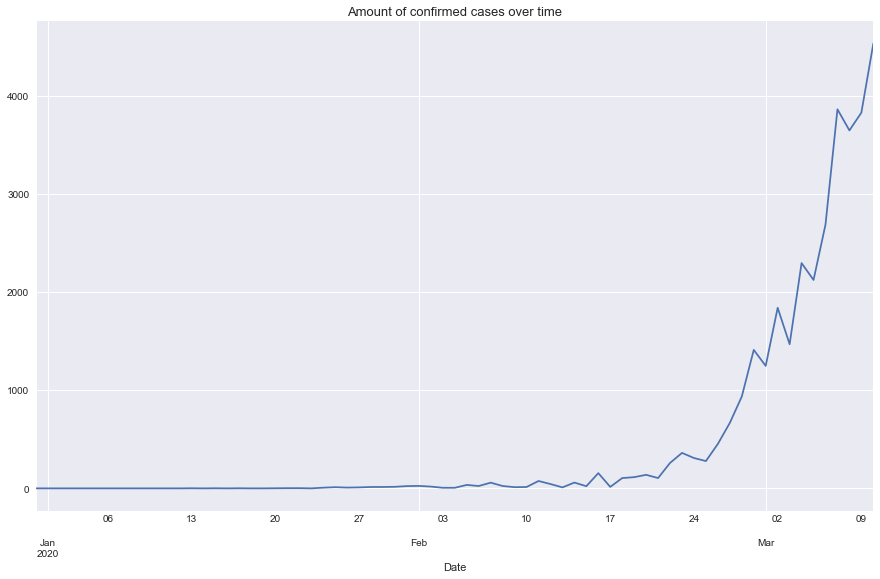

In [4]:
cases_sum = df.groupby('Date')['NewConfCases'].sum()
cases_sum.plot(figsize=(15,9))
plt.title('Amount of confirmed cases over time', size=13)
plt.savefig('../plots/plt1.png', dpi=100)
plt.show()

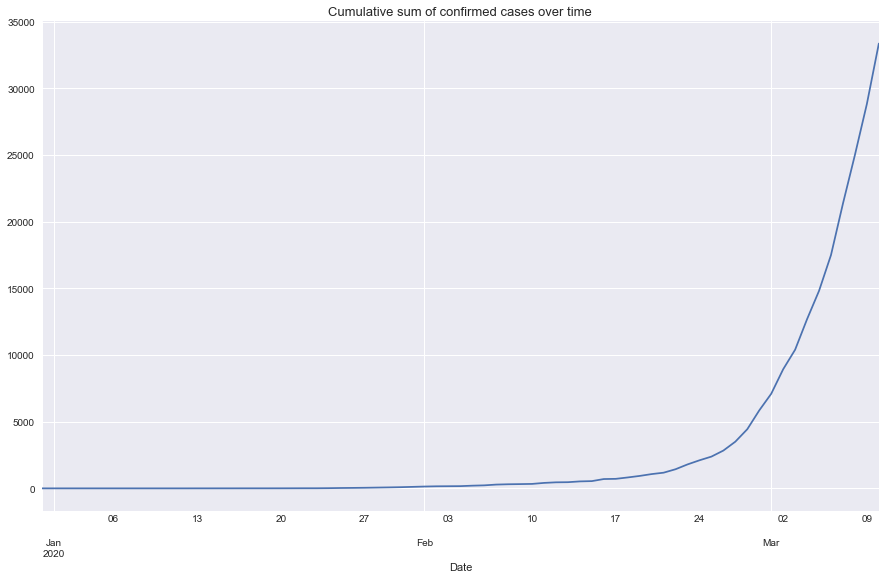

In [5]:
cases_cumsum = cases_sum.cumsum()
cases_cumsum.plot(figsize=(15,9))
plt.title('Cumulative sum of confirmed cases over time', size=13)
plt.savefig('../plots/plt2.png')
plt.show()

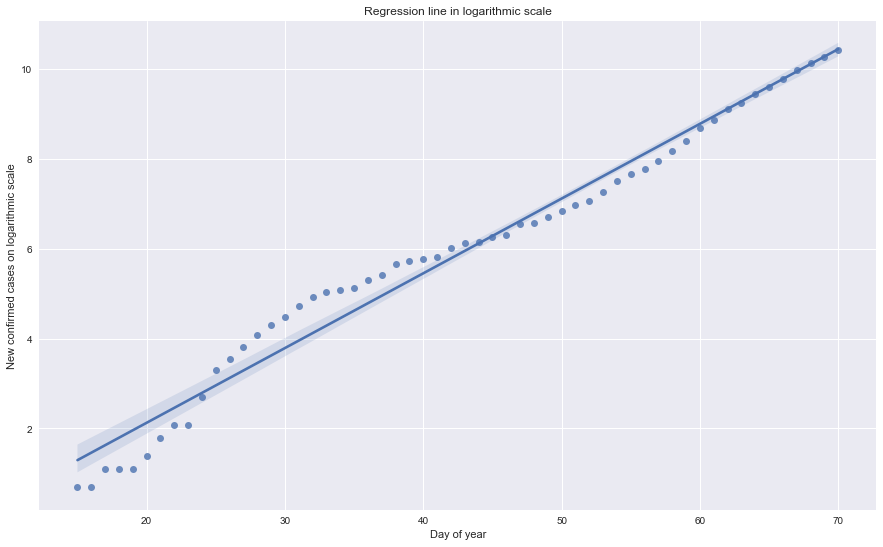

In [6]:
log_cumsum = np.log(cases_cumsum[cases_cumsum.gt(1)]).to_frame().reset_index()
log_cumsum['Date'] = log_cumsum['Date'].dt.dayofyear

plt.figure(figsize=(15,9))
plt.title("Regression line in logarithmic scale")
sns.regplot(x='Date', y='NewConfCases', data=log_cumsum)
plt.xlabel('Day of year')
plt.ylabel('New confirmed cases on logarithmic scale')
plt.savefig('../plots/plt3.png')
plt.show()

In [7]:
X = log_cumsum['NewConfCases']
y = log_cumsum['Date']

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Date   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              6238.
Date:                Tue, 10 Mar 2020   Prob (F-statistic):                    2.65e-58
Time:                        16:35:03   Log-Likelihood:                         -160.50
No. Observations:                  56   AIC:                                      323.0
Df Residuals:                      55   BIC:                                      325.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
NewConfCases     7.0002      0.089     78.983      0.000       6.823       7.178
==============================================================================
Omnibus:                       13.647   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.221
Skew:                           1.255   Prob(JB):                     0.000495
Kurtosis:                       3.477   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

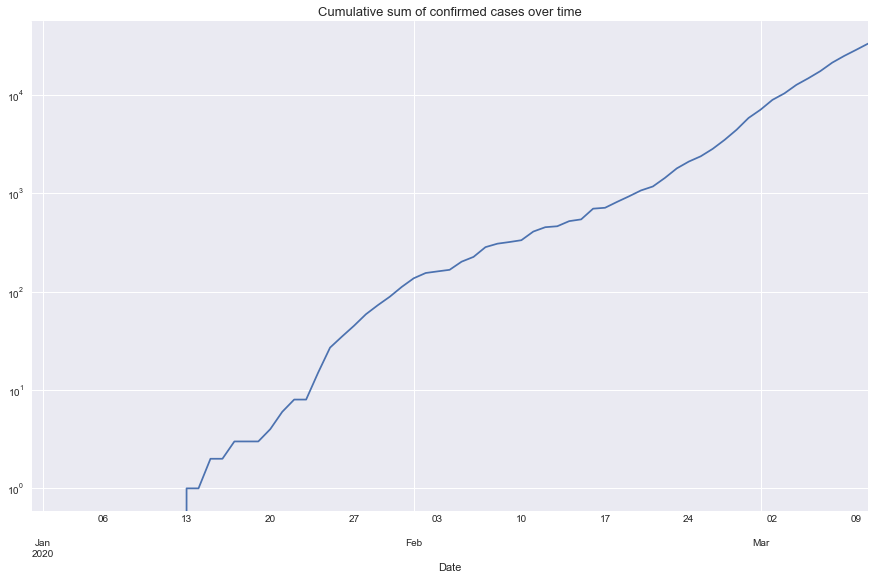

In [8]:
cases_cumsum.plot(figsize=(15,9), logy=True)
plt.title('Cumulative sum of confirmed cases over time', size=13)
plt.savefig('../plots/plt4.png')
plt.show()

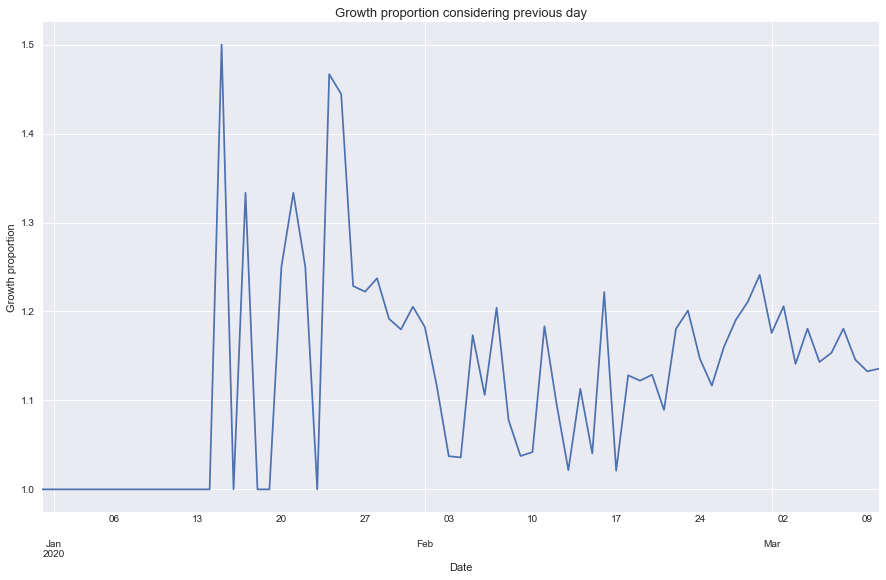

In [9]:
cases_cumsum = cases_cumsum.replace(0, 1)
cases_cumsum.diff().div(cases_cumsum).add(1).fillna(1).plot(figsize=(15,9))
plt.title('Growth proportion considering previous day', size=13)
plt.ylabel('Growth proportion')
plt.savefig('../plots/plt5.png')
plt.show()

In [10]:
df.groupby('Country')['NewConfCases'].max().sort_values(ascending=False).head(15)

Country
Italy                       1797
Iran                        1234
South Korea                  909
Spain                        615
France                       410
Germany                      284
United States of America     200
Japan                        134
Switzerland                  122
Netherlands                   77
Sweden                        76
Denmark                       75
United Kingdom                67
Belgium                       60
Norway                        34
Name: NewConfCases, dtype: int64

In [11]:
df.groupby('Country')['NewConfCases'].sum().sort_values(ascending=False).head(15)

Country
Italy                       9172
South Korea                 7513
Iran                        7161
France                      1412
Japan                       1210
Spain                       1204
Germany                     1139
United States of America     754
Switzerland                  374
United Kingdom               321
Netherlands                  321
Sweden                       248
Belgium                      239
Norway                       192
Singapore                    160
Name: NewConfCases, dtype: int64

---